# Project III

##### Contributors: Armand Sandvik (245472), Eirik Søyland (244724) and Jørund Eldøy (274351)

### Abstract

### Introduction

### Topic 1)

#### Task 0:

In [1]:
from project_3 import Monte_Carlo_simulations

monte_carlo = Monte_Carlo_simulations([-1, -1, -1], [1, 1, 1])

#### Task 1:

In [2]:
point = monte_carlo.place_random_point()
print(point)

[ 5.46248265e-10  2.80409114e-10 -9.44325978e-10]


#### Task 2:

In [3]:
center, radius = monte_carlo.place_random_sphere()
print(f"Center of the sphere has x, y, z coordinates: {center}, and radius {radius}")

Center of the sphere has x, y, z coordinates: [-5.41432240e-10  7.08985581e-10 -3.04572714e-10], and radius 2.1939404640213672e-10


#### Task 3:

In [4]:
print(monte_carlo.in_sphere(point, center, radius))

False


#### Task 4:

(-1e-09, 1e-09)

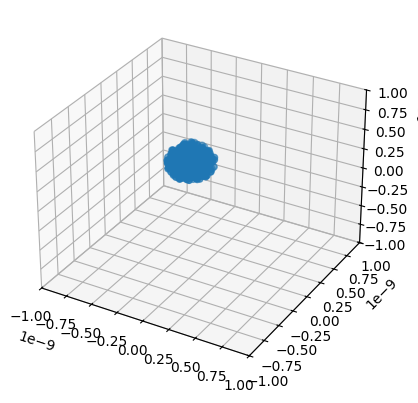

In [7]:
import matplotlib.pyplot as plt

points_inside, fraction = monte_carlo.calculate_fraction_of_points(100000, center, radius)
min_x, min_y, min_z = monte_carlo.min_xyz
max_x, max_y, max_z = monte_carlo.max_xyz

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(points_inside[: ,0], points_inside[: ,1], points_inside[: ,2])
ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)
ax.set_zlim(min_z, max_z)


#### Task 5:

#### Task 6:

#### Task 7:

#### Task 8:

#### Task 9:

#### Task 10:

### Topic 2)

#### Task 1:

#### Task 2:

#### Task 3:

#### Task 4:

#### Task 5:

### Summary/conclusion

### Self-reflection

### Bibliography